Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 4.0

In [29]:
# Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

## 1.

In [30]:
# Números aleatorios en el plano y = 2x_1 + 3x_2

def func(x1,x2):
    return 2.1*x1 - 3.1*x2

In [31]:
# Número de datos 
m = 20
# Número de características
n = 2

x = np.random.uniform(-1,1,(m,2))
Y = func(x[:,0], x[:,1])

<IPython.core.display.Javascript object>


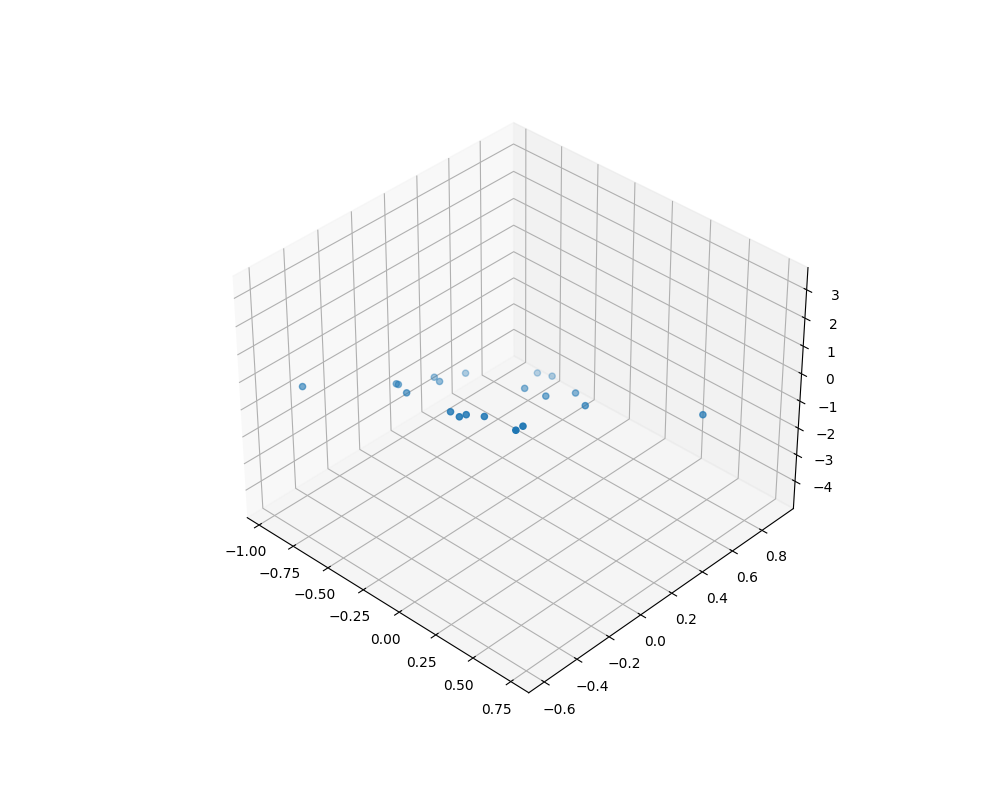

In [41]:
# Gráfica de puntos de entrenamiento
%matplotlib notebook  

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.scatter(x[:,0], x[:,1], Y)

plt.show()

In [34]:
# Matriz de características
X = np.ones((n+1,m))
X[1:, :] = np.transpose(x)
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.0769595 , -0.78118875, -0.52370719,  0.66644229, -0.91400403,
        -0.93975864,  0.22183037, -0.10903802, -0.80665707, -0.37297219,
        -0.12197183,  0.74275745, -0.96293895,  0.23616377,  0.27110525,
         0.18537907, -0.6631034 ,  0.59022556, -0.7967288 , -0.77416287],
       [-0.43352784, -0.00400764, -0.17324999, -0.58493845,  0.33453047,
        -0.44597925, -0.5097619 ,  0.31810336,  0.00491503,  0.42829166,
         0.52267177,  0.49303172,  0.57949596,  0.24094659, -0.40807566,
        -0.43772833,  0.8813639 , -0.47328139,  0.90674102,  0.24608728]])

In [35]:
# Función de coste

def Cost(TH):
    
    hxy = np.matmul(TH, X) - Y
    
    return np.dot(hxy,hxy)

In [36]:
# Aplicación del gradiente descendente

def grad(TH):
    
    hxy = np.matmul(TH, X) - Y
    
    return np.matmul(hxy,np.transpose(X))

In [37]:
THp = []

# Inicialización del vector de parámetros

for i in range(0,n+1):
    THp.append(np.random.uniform(-1,1))
    
THp = np.array(THp)

alpha = 0.01
TH = THp - alpha*grad(THp) 
THn = TH - alpha*grad(TH) 

In [38]:
# Gradiente descendiente

alpha = 0.01

while (Cost(THn) < Cost(TH)):
    TH = THn
    THn = TH - alpha*grad(TH) 

In [39]:
print('Los valores óptimos son θ_0 = ', TH[0], ", θ_1 = " ,TH[1],", θ_2 = ", TH[2] )

Los valores óptimos son θ_0 =  9.485869499591238e-16 , θ_1 =  2.1000000000000063 , θ_2 =  -3.099999999999992


<IPython.core.display.Javascript object>


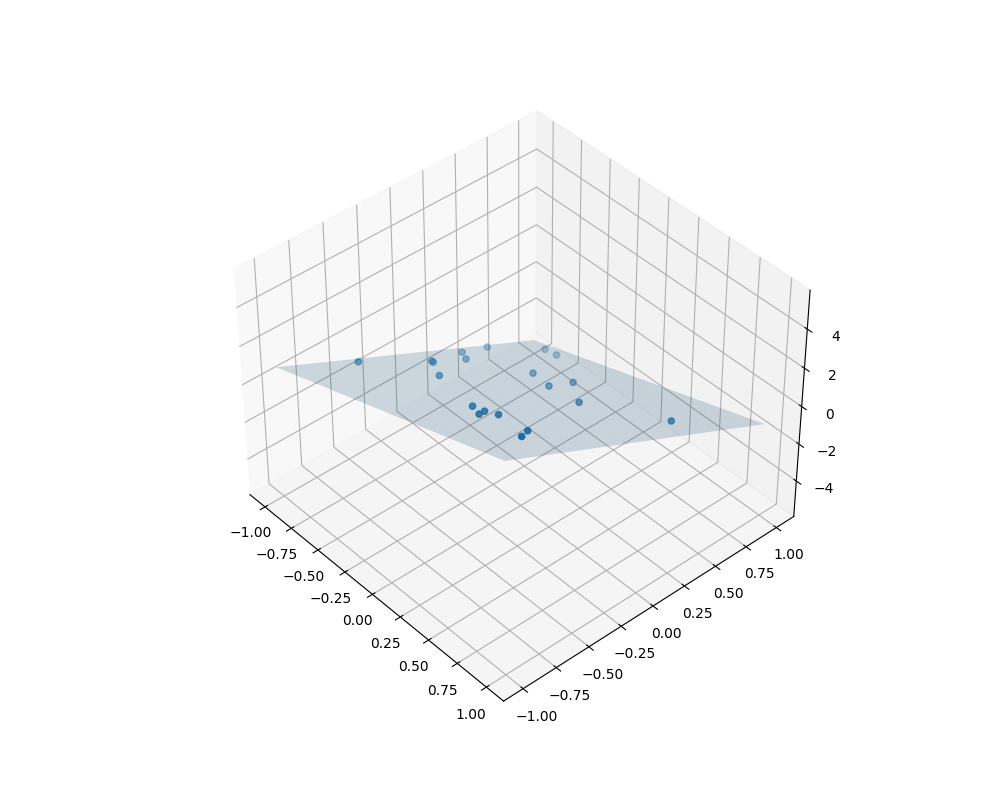

In [40]:
%matplotlib notebook  

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')
ax.scatter(x[:,0], x[:,1], Y)

xspace = np.linspace(-1,1,100)
yspace = np.linspace(-1,1,100)
xx, yy = np.meshgrid(xspace, yspace)
zz = func(xx,yy)
ax.plot_surface(xx, yy, zz, alpha = 0.2)

plt.show()